In [22]:
pip install pyclustertend

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('glass.csv')

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
df = df.drop('Type',axis=1)

In [11]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
df['ID'] = df.index+100

In [13]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,104
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,309
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,310
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,311
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,312


In [16]:
f = df.columns[:-1]
list(enumerate(f))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

DIAGRAMA DE CAJAS PARA VER SI EXISTEN VALORES ATIPICOS

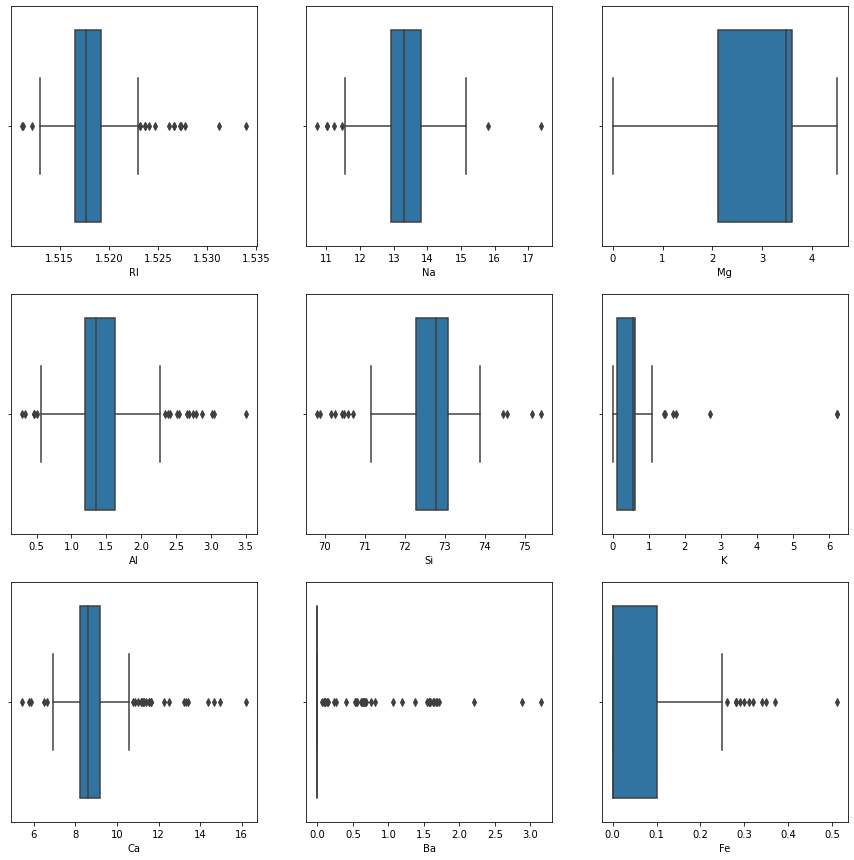

In [18]:
plt.figure(figsize=(15,15))
for i in enumerate(f):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x = i[1],data = df) 

ELIMINAR VALORES ATIPICOS

In [19]:
for i in f:
  q1 = df[i].quantile(0.01)
  q4 = df[i].quantile(0.99)
  df[i][df[i] <= q1] = q1
  df[i][df[i] >= q4] = q4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist

In [20]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518330,13.395997,2.681983,1.443764,72.646869,0.462539,8.951611,0.166537,0.056150,206.500000
std,0.002826,0.764537,1.439680,0.486743,0.742279,0.394835,1.374597,0.454068,0.094157,61.920648
min,1.512259,11.056000,0.000000,0.470000,70.173000,0.000000,5.948000,0.000000,0.000000,100.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,153.250000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,206.500000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,259.750000
max,1.527721,15.131800,3.964800,3.001800,74.537000,2.577800,14.643600,2.136300,0.348700,313.000000


In [24]:
ss = StandardScaler()
df2 = ss.fit_transform(df.drop('ID',axis=1))

In [25]:
df2

array([[ 0.95054898,  0.31989926,  0.89313215, ..., -0.14701324,
        -0.3676265 , -0.59774091],
       [-0.25528601,  0.64766113,  0.63914842, ..., -0.81786965,
        -0.3676265 , -0.59774091],
       [-0.76244602,  0.17568404,  0.60433705, ..., -0.85432924,
        -0.3676265 , -0.59774091],
       ...,
       [ 0.82287234,  1.26385345, -1.86727004, ..., -0.37306268,
         3.25263661, -0.59774091],
       [-0.64540909,  1.2900744 , -1.86727004, ..., -0.34389501,
         3.09811319, -0.59774091],
       [-0.43261468,  1.09341728, -1.86727004, ..., -0.24180816,
         3.31886094, -0.59774091]])

In [26]:
df2 = pd.DataFrame(df2)

In [27]:
df2

,0,1,2,3,4,5,6,7,8
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741
...,...,...,...,...,...,...,...,...,...
209,-0.744713,0.975423,-1.867270,2.957628,-0.049787,-0.971130,0.166539,1.972300,-0.597741
210,-0.524826,1.998040,-1.867270,1.124860,0.557876,-1.174222,-0.402230,3.142263,-0.597741
211,0.822872,1.263853,-1.867270,1.186638,1.044006,-1.174222,-0.373063,3.252637,-0.597741
212,-0.645409,1.290074,-1.867270,1.021895,1.300574,-1.174222,-0.343895,3.098113,-0.597741


MIENTRAS MAS BAJO ES EL HOPKINS ES MEJOR 

In [28]:
hopkins(df2,df2.shape[0])

0.16670771843836418

ELBOW

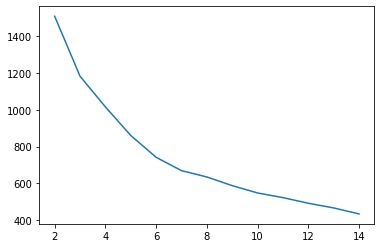

In [29]:
ss = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k).fit(df2)
  ss.append([k,kmeans.inertia_])

ss = pd.DataFrame(ss)
plt.plot(ss[0],ss[1])

**SE PODRIA UTILIZAR SEIS CLUSTER EN RELACION A LOS 7 DE LA DATA**

METODO SILUETA DE 6 

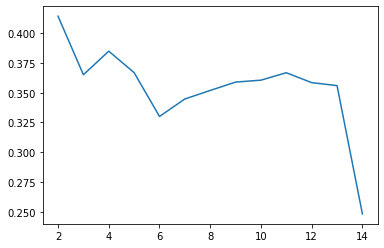

In [34]:
si = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k,random_state=0).fit(df2)
  si.append([k,silhouette_score(df2,kmeans.labels_)])
si = pd.DataFrame(si)
plt.plot(si[0],si[1])

EN BASE A ELBOW Y SILOUTE SE TIENE 3 Y 6 CLUSTER COMO GRUPOS ESPECIFICOS POR LO QUE ESPECIFICAMOS Y CORROBORAMOS CON DENDOGRAMA LA CLASIFICACION DE 
DICHOS GRUPOS

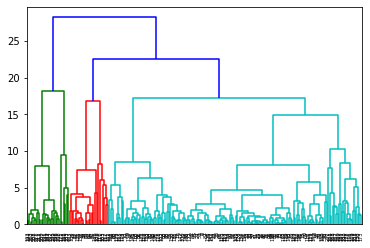

In [37]:
dendo = sch.dendrogram(sch.linkage(df2,method='ward',metric='euclidean'))

CON 3 CLUSTERS

In [59]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [60]:
kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [61]:
df['labels'] = kmeans.labels_

In [62]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,labels
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.00,0.0,100,0
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.00,0.0,101,2
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.00,0.0,102,2
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.00,0.0,103,2
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.00,0.0,104,2
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.0000,2.88,72.61,0.08,9.18,1.06,0.0,309,1
210,1.51685,14.92,0.0000,1.99,73.06,0.00,8.40,1.59,0.0,310,1
211,1.52065,14.36,0.0000,2.02,73.42,0.00,8.44,1.64,0.0,311,1
212,1.51651,14.38,0.0000,1.94,73.61,0.00,8.48,1.57,0.0,312,1


In [63]:
df['labels'].value_counts()

2    134
0     51
1     29
Name: labels, dtype: int64

In [64]:
df.groupby('labels')[['Ca','Fe','K','Mg']].mean()

,Ca,Fe,K,Mg
labels,,,,
0,10.641780,0.061935,0.210392,2.226565
1,8.478138,0.013448,0.171724,0.353103
2,8.410806,0.063190,0.621443,3.359325


In [65]:
df[df['labels']==0].ID

0      100
17     117
18     118
21     121
38     138
39     139
43     143
47     147
48     148
50     150
61     161
62     162
63     163
64     164
65     165
66     166
67     167
68     168
69     169
103    203
104    204
105    205
106    206
107    207
108    208
109    209
110    210
111    211
112    212
127    227
128    228
129    229
130    230
131    231
151    251
157    257
162    262
165    265
166    266
167    267
169    269
170    270
173    273
175    275
176    276
177    277
178    278
183    283
187    287
188    288
189    289
Name: ID, dtype: int64

In [66]:
df[df['labels']==1].ID

163    263
180    280
181    281
182    282
184    284
186    286
190    290
191    291
192    292
193    293
194    294
195    295
196    296
197    297
198    298
199    299
200    300
202    302
203    303
204    304
205    305
206    306
207    307
208    308
209    309
210    310
211    311
212    312
213    313
Name: ID, dtype: int64

In [67]:
df[df['labels']==2].ID

1      101
2      102
3      103
4      104
5      105
      ... 
172    272
174    274
179    279
185    285
201    301
Name: ID, Length: 134, dtype: int64

CENTROIDES

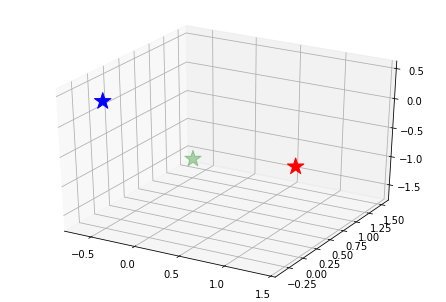

In [71]:
centroides = kmeans.cluster_centers_
colores = ['r','g','b']
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centroides[:,0],centroides[:,1],centroides[:,2],c=colores,marker="*",s = 300)

CON 6 CLUSTERS

In [72]:
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [73]:
kmeans.labels_

array([3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 3, 3, 1, 0, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3,
       0, 1, 0, 3, 3, 1, 3, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 3, 3, 5, 5, 5, 3, 1,
       5, 5, 5, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 5,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 0, 3, 4, 1, 5, 5, 5, 1, 5, 5, 4, 4, 5, 0, 5,
       3, 3, 3, 1, 2, 2, 2, 3, 2, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int32)

In [74]:
df['labels'] = kmeans.labels_

In [75]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,labels
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.00,0.0,100,3
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.00,0.0,101,1
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.00,0.0,102,1
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.00,0.0,103,1
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.00,0.0,104,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.0000,2.88,72.61,0.08,9.18,1.06,0.0,309,2
210,1.51685,14.92,0.0000,1.99,73.06,0.00,8.40,1.59,0.0,310,2
211,1.52065,14.36,0.0000,2.02,73.42,0.00,8.44,1.64,0.0,311,2
212,1.51651,14.38,0.0000,1.94,73.61,0.00,8.48,1.57,0.0,312,2


In [76]:
df['labels'].value_counts()

1    98
3    36
0    34
2    26
5    14
4     6
Name: labels, dtype: int64

In [77]:
df.groupby('labels')[['Ca','Fe','K','Mg']].mean()

,Ca,Fe,K,Mg
labels,,,,
0,8.580294,0.217571,0.560588,3.400882
1,8.441429,0.012653,0.584876,3.366118
2,8.750000,0.015000,0.016538,0.165385
3,9.743056,0.048575,0.174167,3.085411
4,6.367333,0.000000,1.910933,1.523333
5,12.871486,0.088571,0.317143,0.280000


In [78]:
df[df['labels']==0].ID

5      105
10     110
12     112
13     113
20     120
30     130
32     132
44     144
46     146
55     155
56     156
71     171
78     178
90     190
92     192
96     196
97     197
100    200
102    202
113    213
118    218
121    221
125    225
128    228
133    233
135    235
136    236
141    241
142    242
144    244
145    245
150    250
161    261
174    274
Name: ID, dtype: int64

In [79]:
df[df['labels']==1].ID

1      101
2      102
3      103
4      104
6      106
      ... 
160    260
164    264
168    268
179    279
201    301
Name: ID, Length: 98, dtype: int64

In [80]:
df[df['labels']==2].ID

180    280
181    281
182    282
184    284
190    290
191    291
192    292
193    293
194    294
195    295
196    296
197    297
198    298
199    299
200    300
202    302
203    303
204    304
205    305
206    306
208    308
209    309
210    310
211    311
212    312
213    313
Name: ID, dtype: int64

In [81]:
df[df['labels']==3].ID

0      100
17     117
18     118
21     121
36     136
38     138
39     139
43     143
47     147
48     148
50     150
61     161
62     162
63     163
64     164
65     165
66     166
67     167
68     168
69     169
103    203
104    204
108    208
127    227
129    229
130    230
151    251
157    257
162    262
176    276
177    277
178    278
183    283
187    287
188    288
189    289
Name: ID, dtype: int64

In [82]:
df[df['labels']==4].ID

163    263
171    271
172    272
185    285
186    286
207    307
Name: ID, dtype: int64

In [83]:
df[df['labels']==5].ID

105    205
106    206
107    207
110    210
111    211
112    212
131    231
165    265
166    266
167    267
169    269
170    270
173    273
175    275
Name: ID, dtype: int64

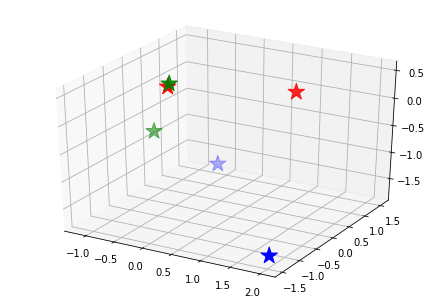

In [90]:
centroides = kmeans.cluster_centers_
colores = ['r','g','b','r','g','b']
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centroides[:,0],centroides[:,1],centroides[:,2],c=colores,marker="*",s = 300)